In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts 
from sklearn.ensemble import RandomForestRegressor as rfc 
import sklearn.metrics as met

In [34]:
cpp = pd.read_csv(r"C:\Users\dhamo\OneDrive\Documents\Internships\Nitroware\Crop Price Dataset.csv")

In [35]:
cpp.head()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10


In [36]:
cpp.shape

(49, 9)

In [37]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             49 non-null     object 
 1   Crop              49 non-null     object 
 2   CostCultivation   49 non-null     float64
 3   CostCultivation2  49 non-null     float64
 4   Production        49 non-null     float64
 5   Yield             49 non-null     float64
 6   Temperature       49 non-null     float64
 7   RainFall Annual   49 non-null     float64
 8   Price             49 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


Crop name preprocessing

In [38]:
cpp.Crop.value_counts()

Crop
ARHAR        5
COTTON       5
GRAM         5
GROUNDNUT    5
MAIZE        5
MOONG        5
PADDY        5
 MUSTARD     5
SUGARCANE    5
WHEAT        4
Name: count, dtype: int64

In [39]:
cpp.Crop.replace(to_replace=[' MUSTARD'],value=['MUSTARD'],inplace=True)

C:\Users\dhamo\AppData\Local\Temp\ipykernel_13820\3524118126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpp.Crop.replace(to_replace=[' MUSTARD'],value=['MUSTARD'],inplace=True)


In [40]:
crop_name = {}
c = np.array(cpp.Crop)
va , ind, co  = np.unique(c,return_counts=True,return_index=True)
   
for i in range(len(ind)):
    crop_name[va[i]] = ind[i]
crop_name

{'ARHAR': 0,
 'COTTON': 5,
 'GRAM': 10,
 'GROUNDNUT': 15,
 'MAIZE': 20,
 'MOONG': 25,
 'MUSTARD': 35,
 'PADDY': 30,
 'SUGARCANE': 40,
 'WHEAT': 45}

State preprocessing

In [41]:
cpp.State.value_counts()

State
Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Karnataka         5
Rajasthan         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Haryana           2
Tamil Nadu        2
Orissa            2
Bihar             1
West Bengal       1
Name: count, dtype: int64

In [42]:
s = np.array(cpp.State)
s_n , s_c = np.unique(s,return_counts=True)
state_name = dict()
s_i = []
for i in range(len(s_c)):
    s_i.append(i)
    state_name[s_n[i]] = i
state_name


{'Andhra Pradesh': 0,
 'Bihar': 1,
 'Gujarat': 2,
 'Haryana': 3,
 'Karnataka': 4,
 'Madhya Pradesh': 5,
 'Maharashtra': 6,
 'Orissa': 7,
 'Punjab': 8,
 'Rajasthan': 9,
 'Tamil Nadu': 10,
 'Uttar Pradesh': 11,
 'West Bengal': 12}

Model : Splitting Data

In [43]:
x = cpp.iloc[:,:-1]
y = cpp.iloc[:,-1]


In [44]:
x.Crop.replace(to_replace=va,value=ind,inplace=True)
x.State.replace(to_replace=s_n , value=s_i , inplace = True)

C:\Users\dhamo\AppData\Local\Temp\ipykernel_13820\3012271339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x.Crop.replace(to_replace=va,value=ind,inplace=True)
C:\Users\dhamo\AppData\Local\Temp\ipykernel_13820\3012271339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.Crop.replace(to_rep

In [45]:
x.head()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual
0,11,0,9794.05,9800.25,1941.55,9.83,28.96,3373.2
1,4,0,10593.15,10594.15,2172.46,7.47,29.22,3520.7
2,2,0,13468.82,13469.82,1898.30,9.59,28.47,2957.4
3,0,0,17051.66,17052.66,3670.54,6.42,28.49,3079.6
4,6,0,17130.55,17131.55,2775.80,8.72,28.30,2566.7


In [46]:
y.head()

0    19589.10
1    21187.30
2    26938.64
3    34104.32
4    34262.10
Name: Price, dtype: float64

In [47]:
x.shape , y.shape

((49, 8), (49,))

In [48]:
xtr , xts , ytr , yts = tts(x,y,test_size = 0.2 , random_state=42)


Model : Random Forest

In [49]:
rf = rfc(n_estimators=100)
rf.fit(xtr,ytr)
pred = rf.predict(xts)
print(met.r2_score(yts,pred))

0.952587056837303


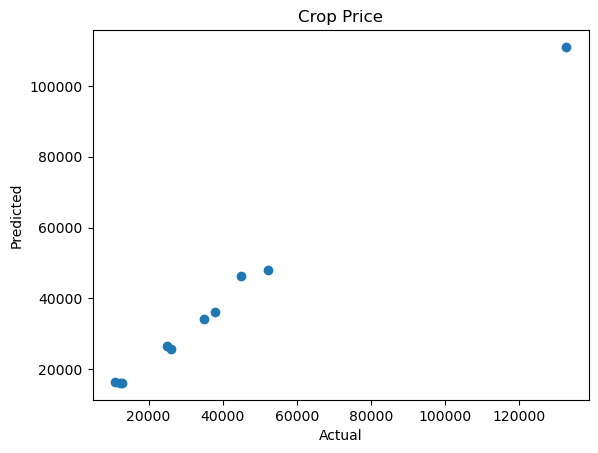

In [50]:
plt.scatter(yts,pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Crop Price")
plt.show()

In [51]:
cpp.columns

Index(['State', 'Crop', 'CostCultivation', 'CostCultivation2', 'Production',
       'Yield', 'Temperature', 'RainFall Annual', 'Price'],
      dtype='object')

In [52]:
x.iloc[0]

State                 11.00
Crop                   0.00
CostCultivation     9794.05
CostCultivation2    9800.25
Production          1941.55
Yield                  9.83
Temperature           28.96
RainFall Annual     3373.20
Name: 0, dtype: float64

In [53]:
x.dtypes

State                 int64
Crop                  int64
CostCultivation     float64
CostCultivation2    float64
Production          float64
Yield               float64
Temperature         float64
RainFall Annual     float64
dtype: object

In [54]:
avg_price1 = cpp.groupby("Crop")['CostCultivation'].mean()
avg_price1

Crop
ARHAR        13607.646
COTTON       28286.874
GRAM         11719.510
GROUNDNUT    21282.782
MAIZE        16610.150
MOONG         7118.670
MUSTARD      12260.490
PADDY        22810.140
SUGARCANE    52164.716
WHEAT        17127.110
Name: CostCultivation, dtype: float64

In [55]:
avg_price2 = cpp.groupby("Crop")['CostCultivation2'].mean()
avg_price2

Crop
ARHAR        13609.686
COTTON       28287.874
GRAM         11720.510
GROUNDNUT    21283.782
MAIZE        16611.150
MOONG         7119.670
MUSTARD      12261.490
PADDY        22811.140
SUGARCANE    52165.716
WHEAT        17128.110
Name: CostCultivation2, dtype: float64

In [56]:
import pickle as pk
mod = {
    "rf" : rf,
    "avg_price1" : avg_price1,
    "avg_price2" : avg_price2
}
with open('Crop_price_pred_pick.pkl', 'wb') as f:
    pk.dump(mod, f)